In [1]:
#SOM (self orginizing map)

import tensorflow as tf
import matplotlib.pyplot as plt

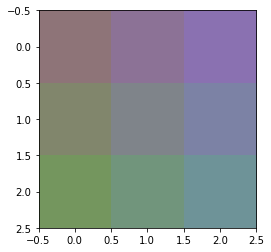

In [11]:
class SOM:
    
    #constructor
    def __init__(self, height,width,input_dimension,learning_rate):
        self.height=height
        self.width=width
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate
        
        #tf.Variable(tf.random_normal([9,3]))
        self.weight=tf.Variable(tf.random_normal([self.height * self.width,self.input_dimension]))
        self.input=tf.placeholder(tf.float32,[self.input_dimension])
        
        self.location=[tf.to_float([y,x]) for y in range (self.height) for x in range(self.width)]
        self.bmu=self.get_bmu()
        self.update=self.update_neighbor()
        
    #BMU -> Best Matching Unit
    def get_bmu(self):
        square=tf.square(self.input-self.weight)
        distance=tf.sqrt(tf.reduce_mean(square,axis=1))
        bmu_index=tf.argmin(distance) #return min index
        
        #tf.to_float([bmu/width,bmu%width])
        bmu_location=tf.to_float([tf.div(bmu_index,self.width),tf.mod(bmu_index,self.width)])
        
        return bmu_location
    
    #Update weight
    def update_neighbor(self):
        
        #calculate distance each cluster from BMU
        square=tf.square(self.bmu - self.location)
        distance=tf.sqrt(tf.reduce_mean(square, axis=1))
        sigma=tf.to_float(tf.maximum(self.width,self.height)/2)
        neighbor_strength=tf.exp(tf.div(tf.negative(tf.square(distance)),2*tf.square(sigma)))
        
        rate=neighbor_strength*self.learning_rate
        stacked_rate=tf.stack([tf.tile(tf.slice(rate,[i],[1]),[self.input_dimension])
                              for i in range (self.width * self.height)])
        
        weight=stacked_rate*(self.input-self.weight)
        new_weight=self.weight+weight
        
        return tf.assign(self.weight, new_weight)
    
    def train(self,dataset,epoch):
        with tf.Session()as sess:
            sess.run(tf.global_variables_initializer())
            for i in range (epoch):
                for data in dataset:
                    sess.run(self.update, feed_dict={self.input:data})
                    
            location = sess.run(self.location)
            weight=sess.run(self.weight)
            
            self.cluster=[[] for i in range(self.height)]
            for i,loc in enumerate(location):
                self.cluster[int(loc[0])].append(weight[i])
            
            #sess.run(self.cluster)
    
def main():
    colors = [
        [0., 0., 0.],  # Black
        [1., 1., 1.],  # White
        [1., 0., 0.],  # Red
        [0., 1., 0.],  # Green
        [0., 0., 1.],  # Blue
        [1., 1., 0.],  # Yellow
        [1., 0., 1.],  # Pink
        [0., 1., 1.]   # Cyan
    ]
    height=3
    width=3
    
    #Total feature (R,G,B)
    input_dimension=3
    learning_rate=0.1
    epoch=1000
    
    som=SOM(height,width,input_dimension,learning_rate)
    som.train(colors,epoch)
    
    plt.imshow(som.cluster)
    plt.show()
if __name__=='__main__':
    main()
    